# Read data
Our data set is stored at **/data7/users/deandres/newML2** . It contains X-ray , Sunyaev–Zeldovich, Optical (Stars) and DM maps. The objective of this notebook is to show how to read the data and efficiently save it  for further preprocessing.

In [1]:
path = "/data7/users/deandres/newML2/"

In [2]:
RAs = np.arange(0,29)
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import plot_cluster

def read_xr(lp,hid,RA):
    region = 'X-ray/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Athena-wfi-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_sz(lp,hid,RA):
    region = 'SZ/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-TT-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_dm(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

In [143]:
region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
s = str(hid)[:3]
file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
print(RA)
data = fits.getdata(path+region+file)
hdul = fits.open(path+region+file)

28


In [166]:
def get_M(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    hdul = fits.open(path+region+file)
    M = np.float(hdul[0].header[-2][12:18])
    return M


In [152]:
M

15.418

In [3]:
lp = 1
hid = 123000000000001

In [4]:
RAs = np.arange(29)

In [10]:
640/2

320.0

In [31]:
indices = []
width, height = dm.shape
x1 = 320
y1 = 320
radiusSquared = 1**2
for x in range(width):
    for y in range(height):
        dx = x - x1
        dy = y - y1
        distanceSquared = dx*dx+dy*dy
        if (distanceSquared <= radiusSquared):
            indices.append((x,y))

def indices_inside(radius):
    radiusSquared = radius**2 
    indices = []
    width, height = dm.shape
    x1 = 320
    y1 = 320
    for x in range(width):
        for y in range(height):
            dx = x - x1
            dy = y - y1
            distanceSquared = dx*dx+dy*dy
            if (distanceSquared <= radiusSquared):
                indices.append((x,y))
                
    return indices            

In [33]:
indices = indices_inside(2)
indices

[(318, 320),
 (319, 319),
 (319, 320),
 (319, 321),
 (320, 318),
 (320, 319),
 (320, 320),
 (320, 321),
 (320, 322),
 (321, 319),
 (321, 320),
 (321, 321),
 (322, 320)]

In [40]:
indices = indices_inside(1)
suma = 0
for i in indices:
    suma = suma + dm[i]
    
suma    

637.0

In [163]:
np.log10(mass_profile*0.12691148*1e10)[-1]

15.407958906292745

In [176]:
Msum=np.log10(np.sum(dm)*0.12691148*1e10)

In [180]:
Msum = 10**Msum
M = 10**M

In [184]:
np.log10(Msum)

15.407958906292745

In [190]:
sz=read_sz(lp,hid,RA)

1


In [198]:
np.log10(dm.sum())

7.805127489907104

In [ ]:
lp = 1
hid = 128000000000001
M = get_M(lp,hid,RA)
fig = plt.figure(figsize=(10,6))
RAs = np.arange(29)
for RA in RAs:
    dm = read_xr(lp,hid,RA)
    rads = np.arange(0,640,22)
    mass_profile = np.empty((len(rads),))

    j = 0

    for r in rads: 
        suma = 0
        indices = indices_inside(r)
        for i in indices:
            suma = suma + dm[i]
        mass_profile[j] = suma 
        j+=1
    
    
    plt.plot(np.arange(0,30)/29,np.log10(mass_profile))

plt.plot()    
#plt.plot([0,1],[M,M],'r--')
plt.xlabel(r'$r/R_{200}$',fontsize=15)
plt.ylabel(r' log integrated x ray number of photons',fontsize=15)
plt.xticks()
#plt.xscale('log')
plt.show()    

28
0
1
2
3
4


In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(0,30)/29,np.log10(mass_profile*0.12691148*1e10))
plt.xlabel(r'$r/R_{200}$',fontsize=15)
plt.ylabel(r'log $M/M_{sun}$',fontsize=15)
plt.xticks()
plt.show()

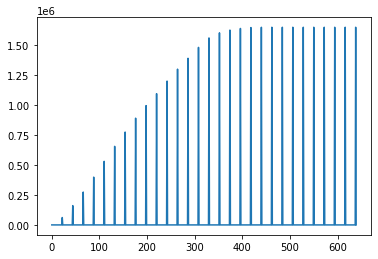

In [79]:
plt.plot(mass_profile)

In [81]:
rads.shape

(30,)

In [25]:
plot_cluster(dm)
def circle_points(r,thetha):
    x = 320+int(r*np.cos(theta))
    y = 320+int(r*np.sen(theta))
    return x,y
def disk_points(r)
    pi =

SyntaxError: invalid syntax (<ipython-input-25-6c702599eded>, line 6)

0
0
0


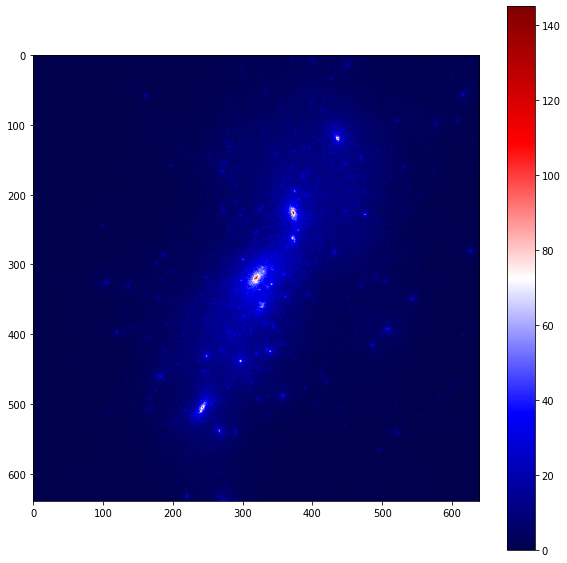

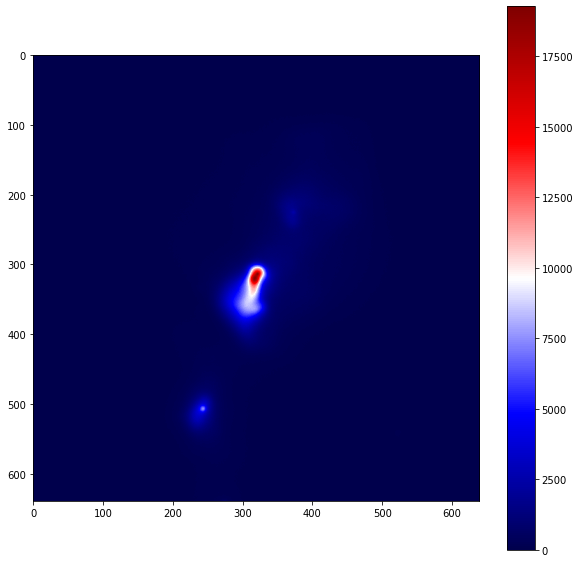

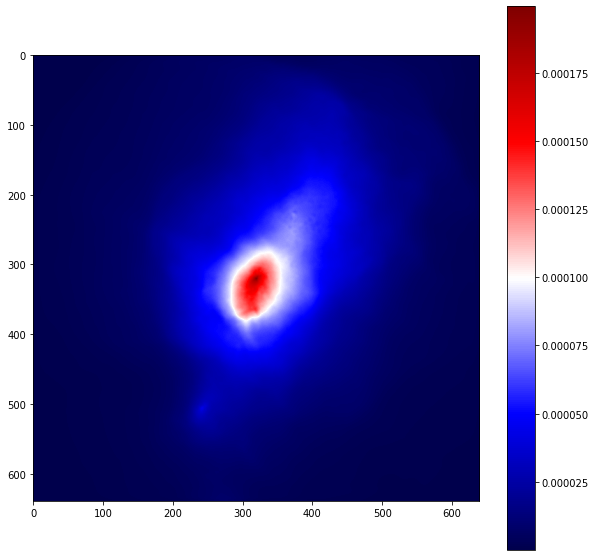

1
1
1


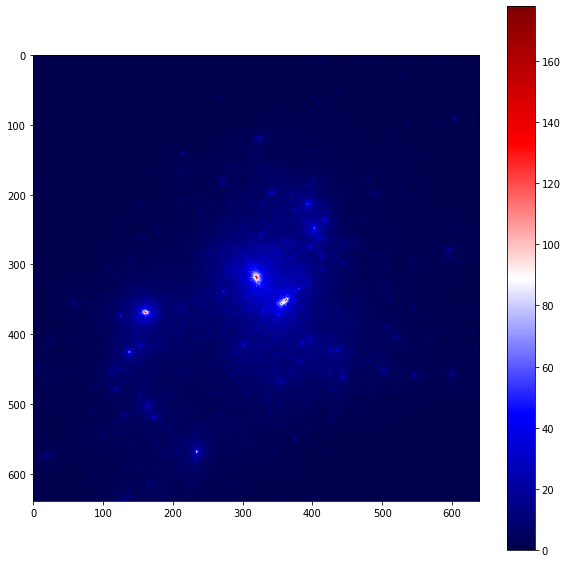

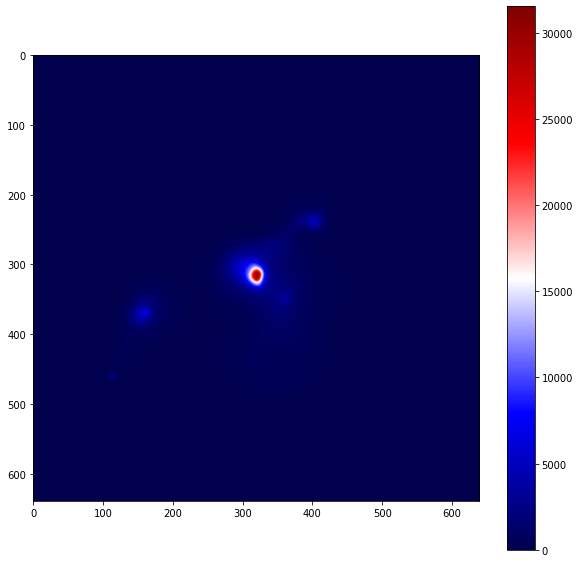

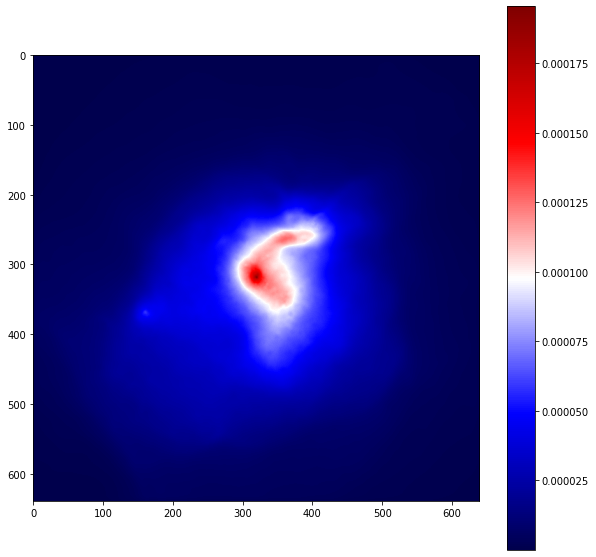

2
2
2


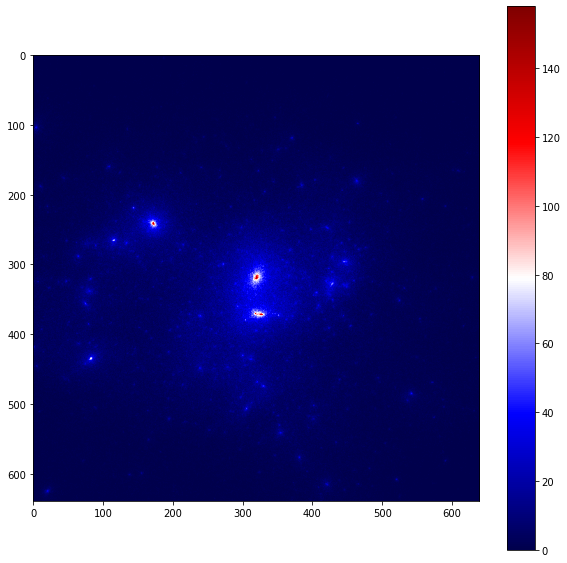

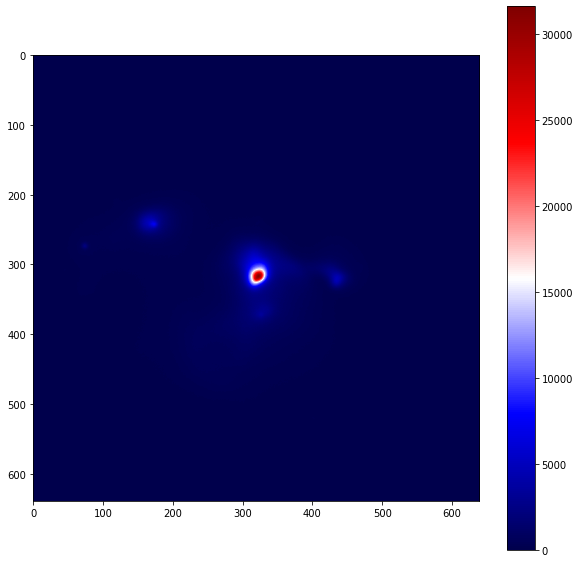

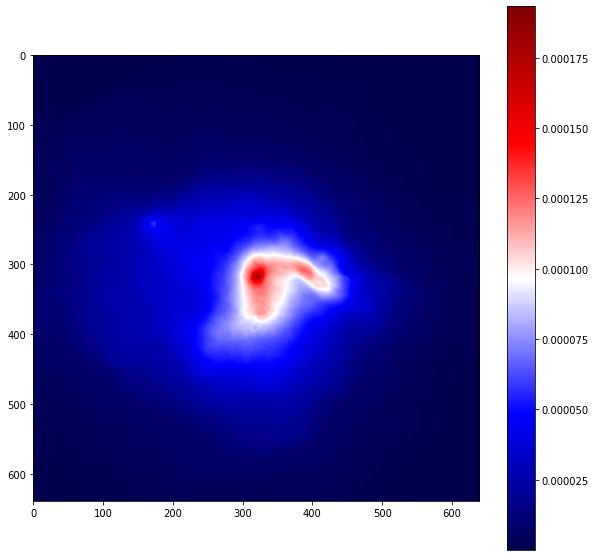

3
3
3


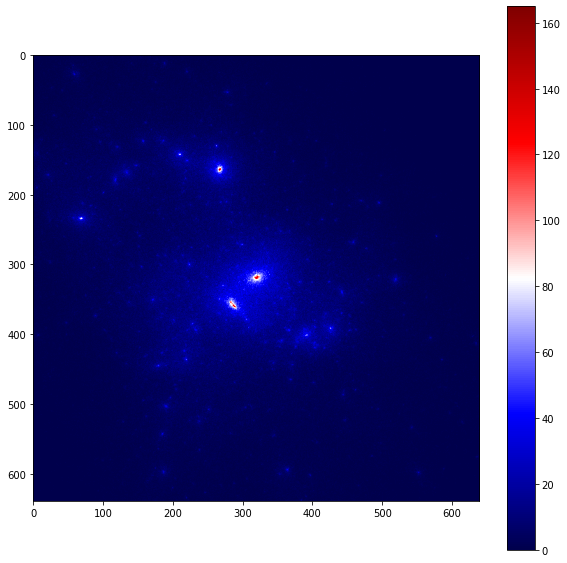

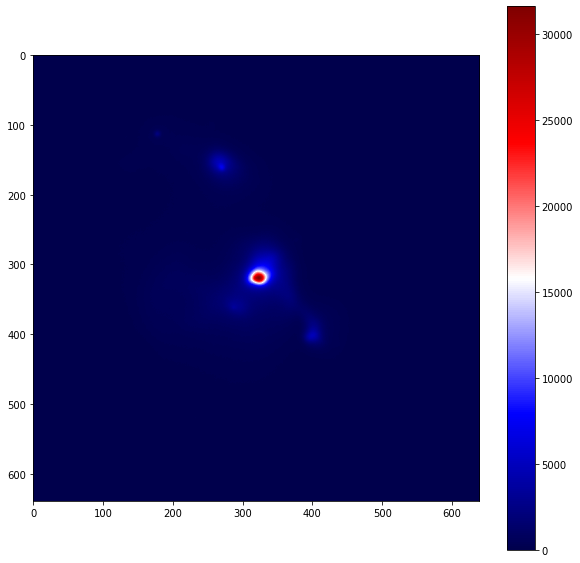

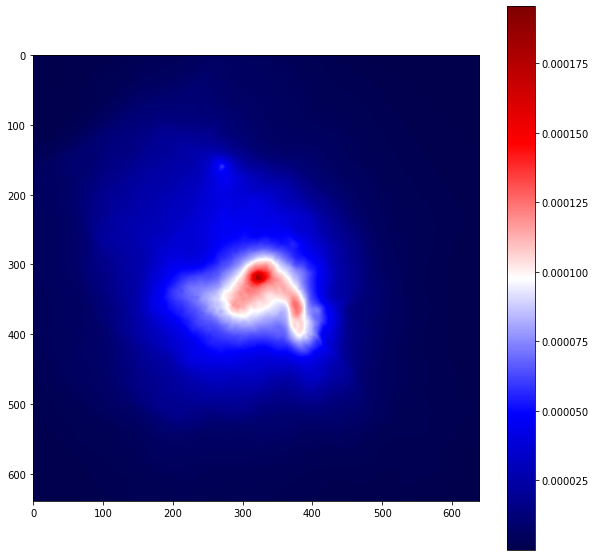

4
4
4


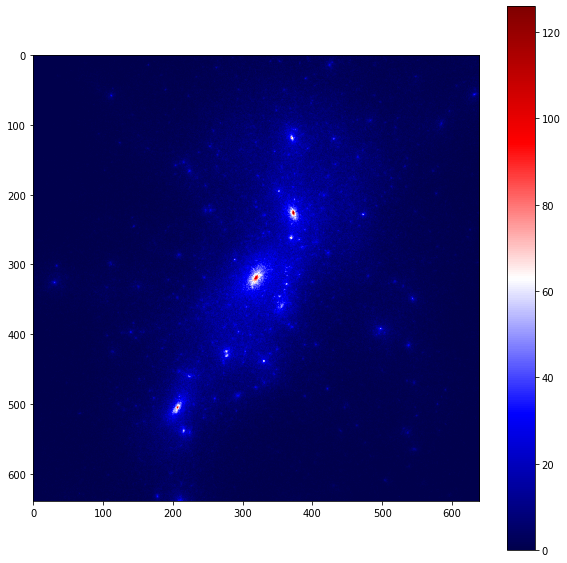

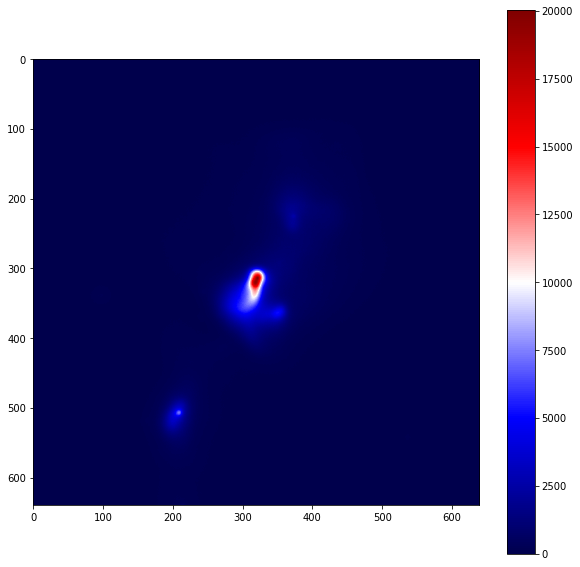

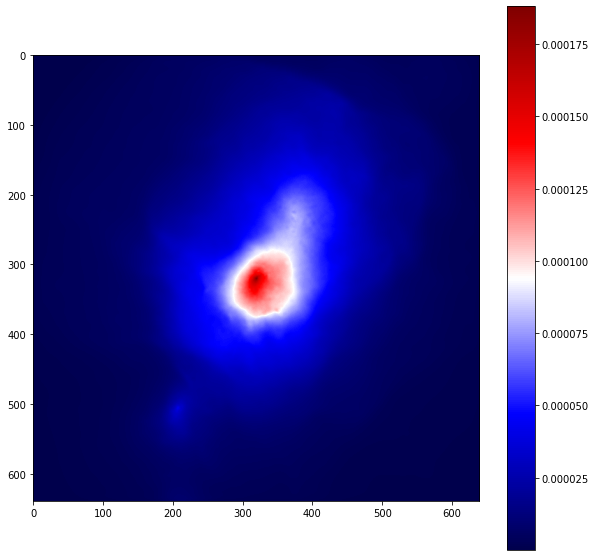

5
5
5


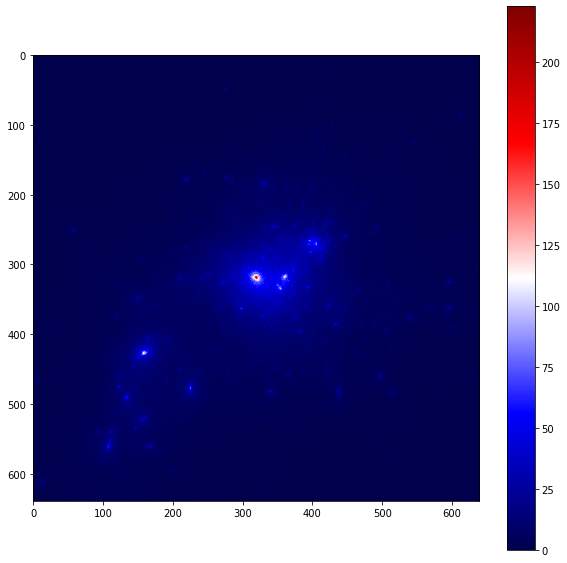

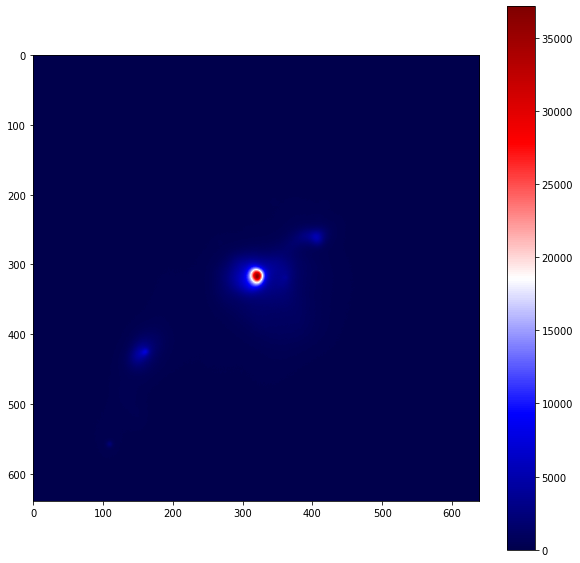

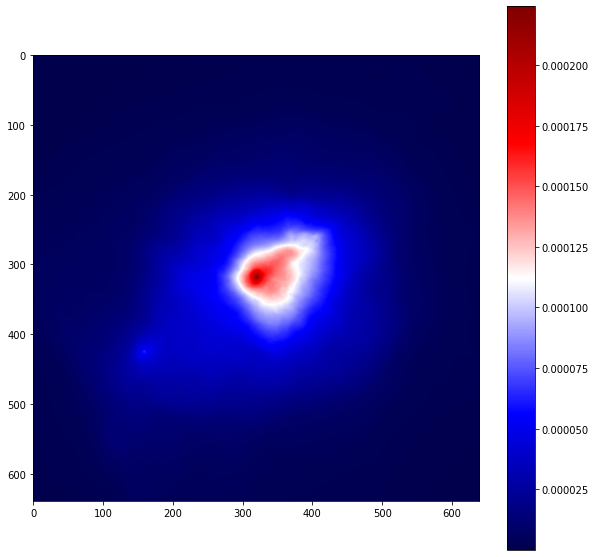

6
6
6


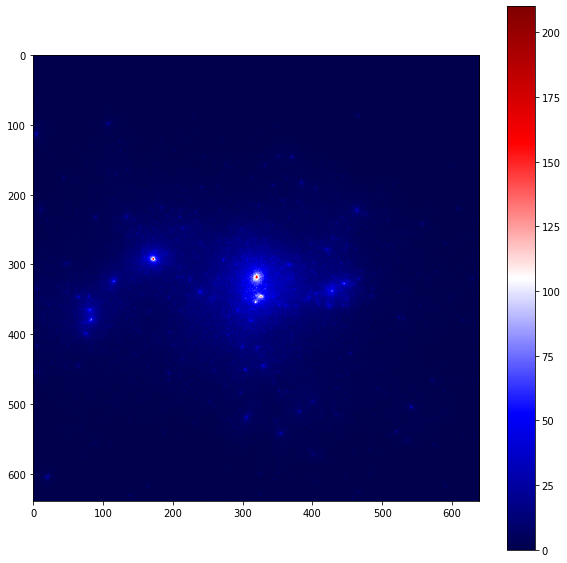

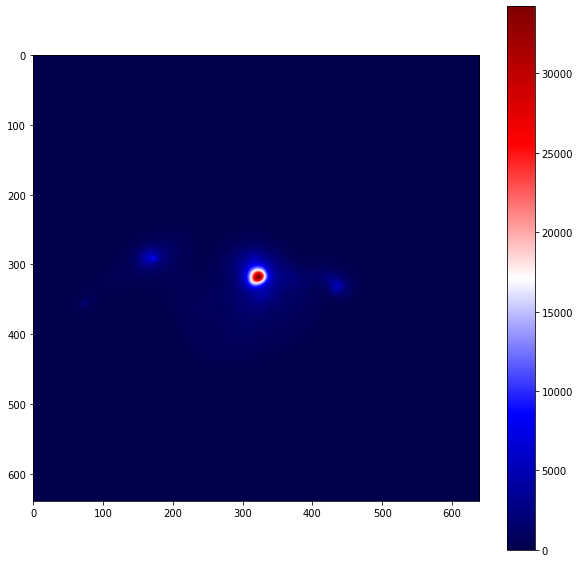

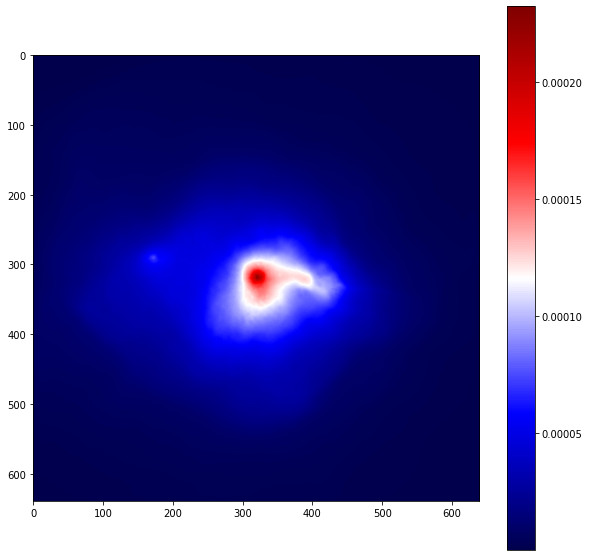

7
7
7


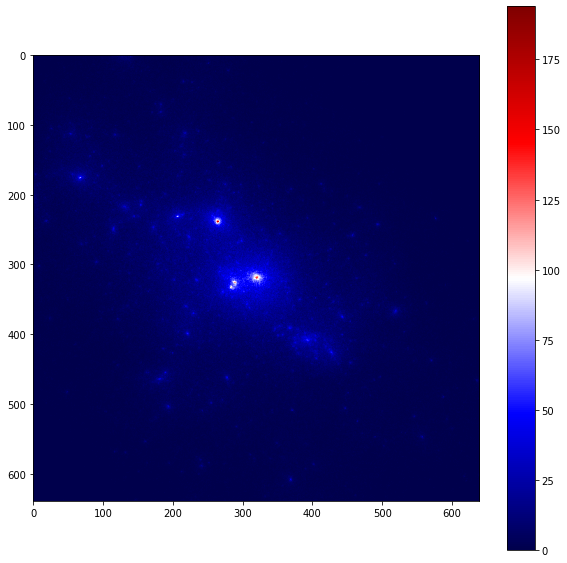

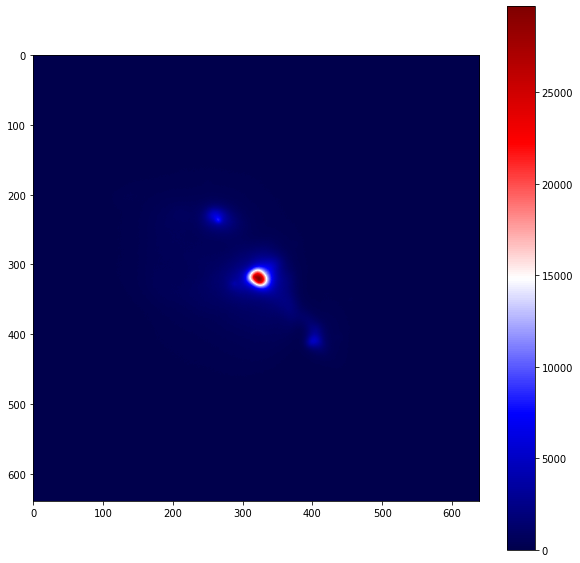

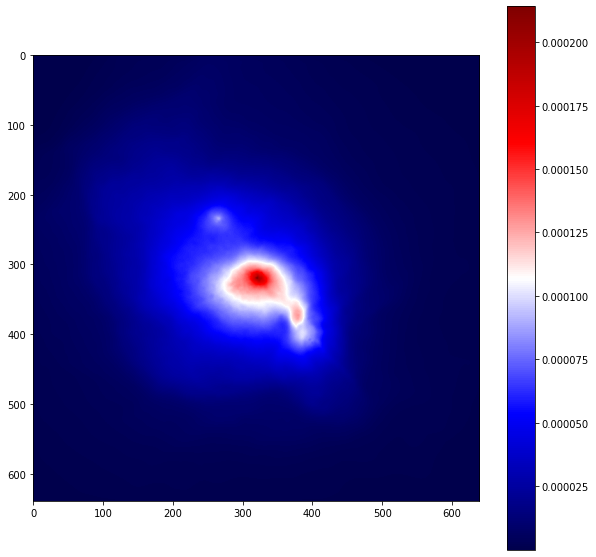

8
8
8


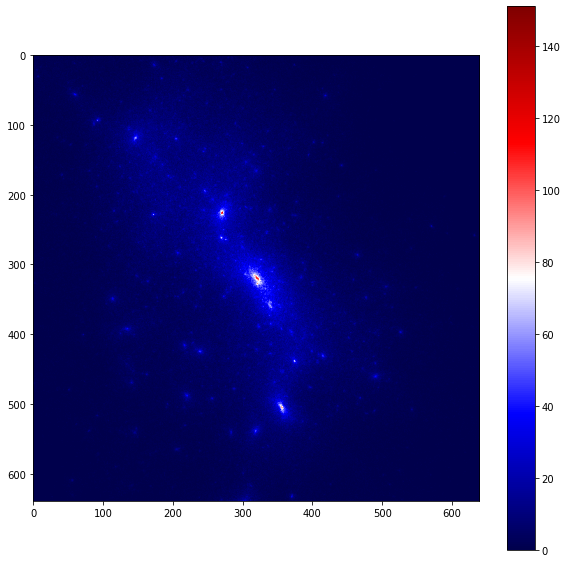

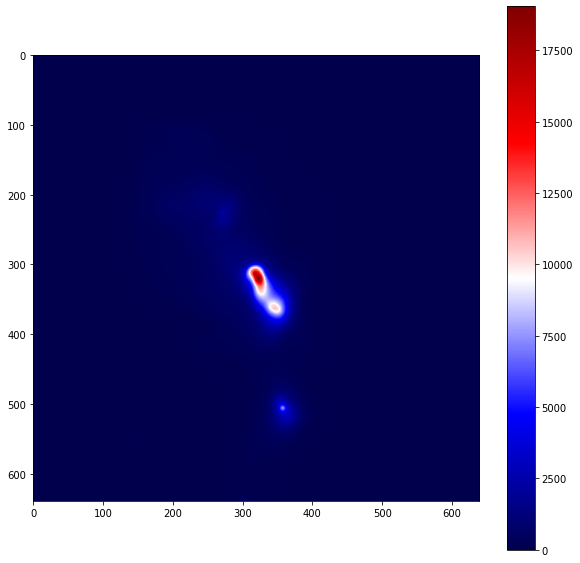

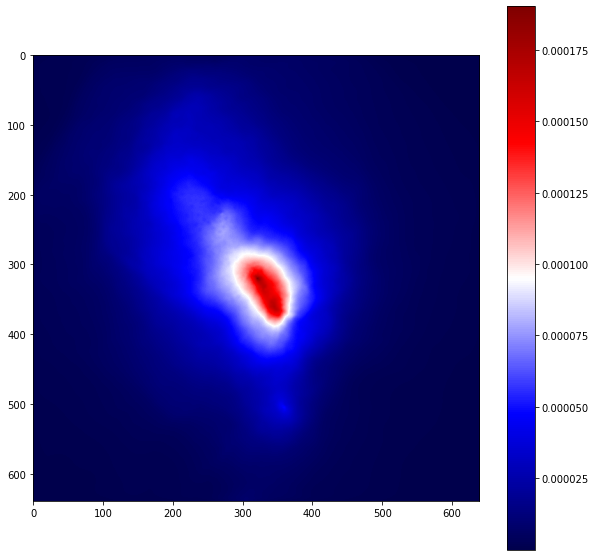

9
9
9


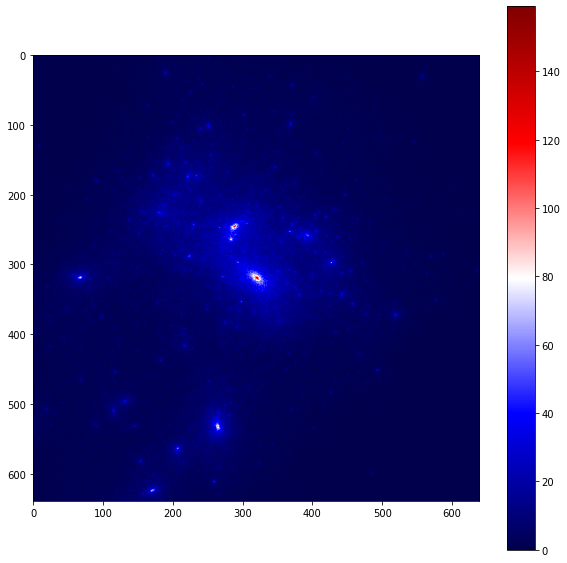

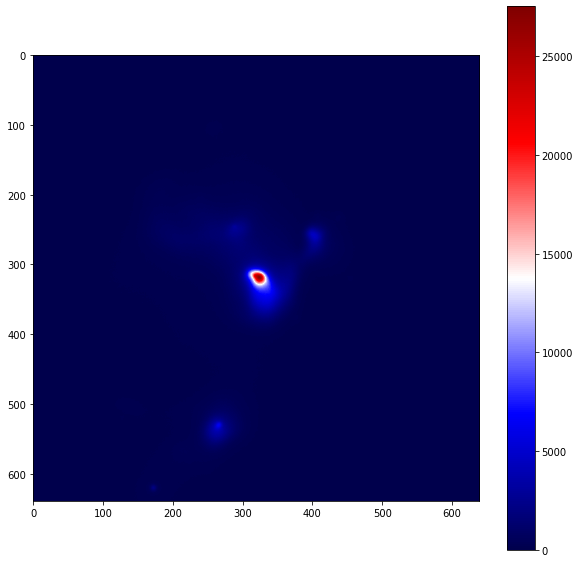

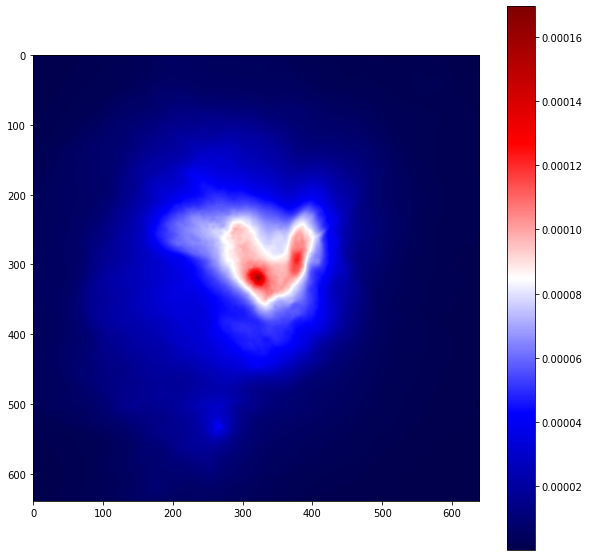

10
10
10


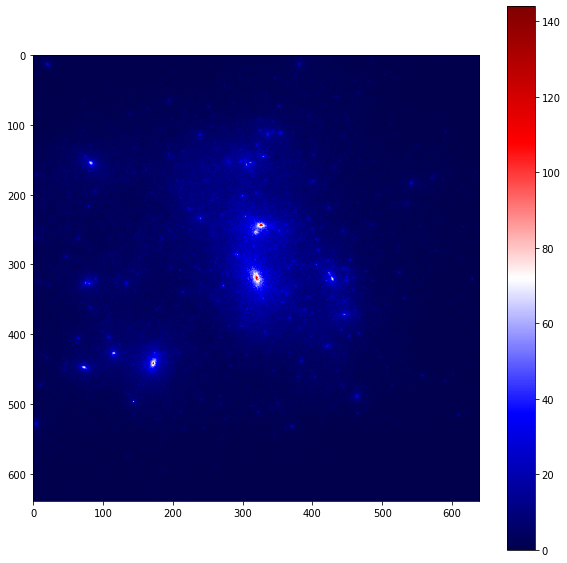

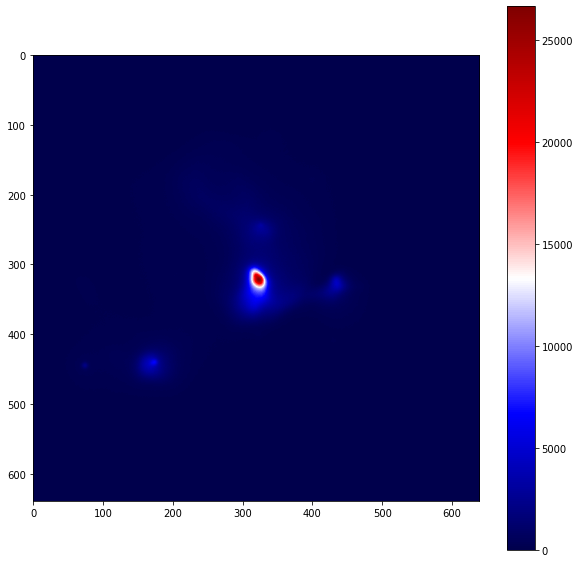

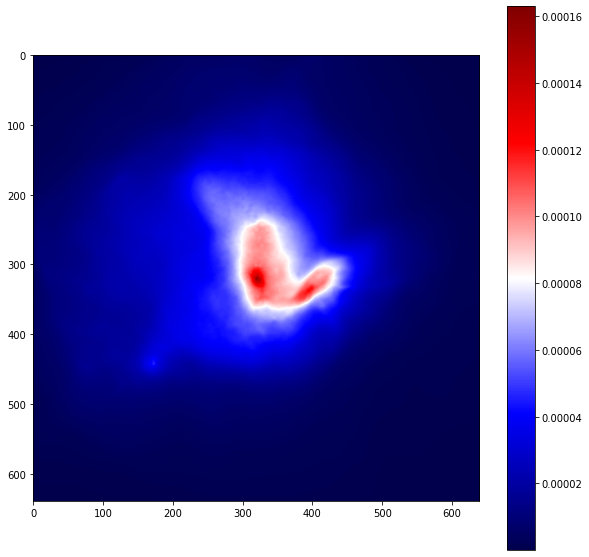

11
11
11


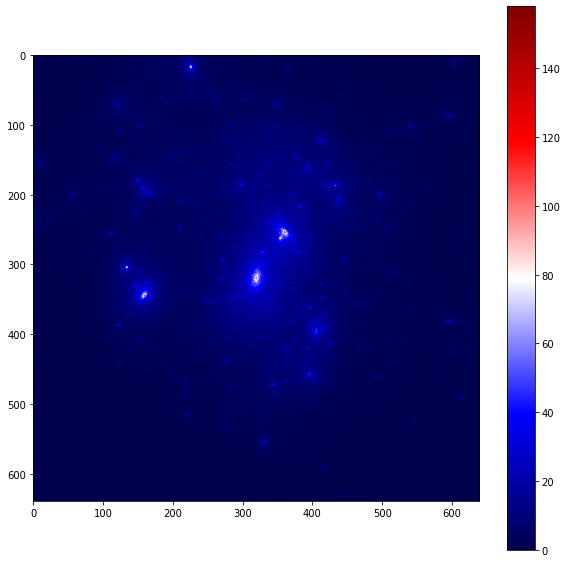

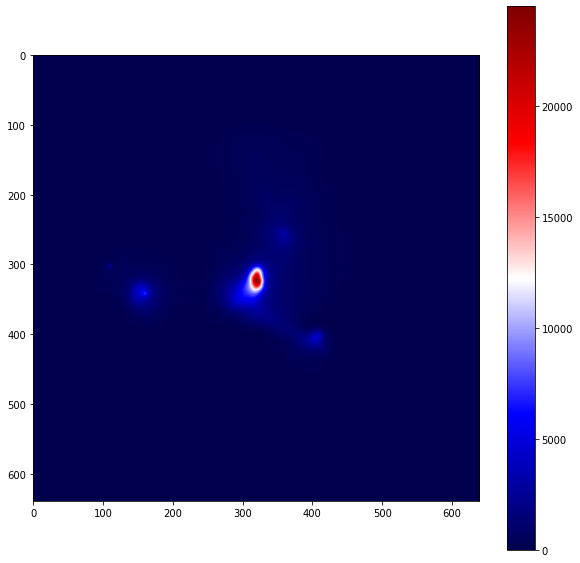

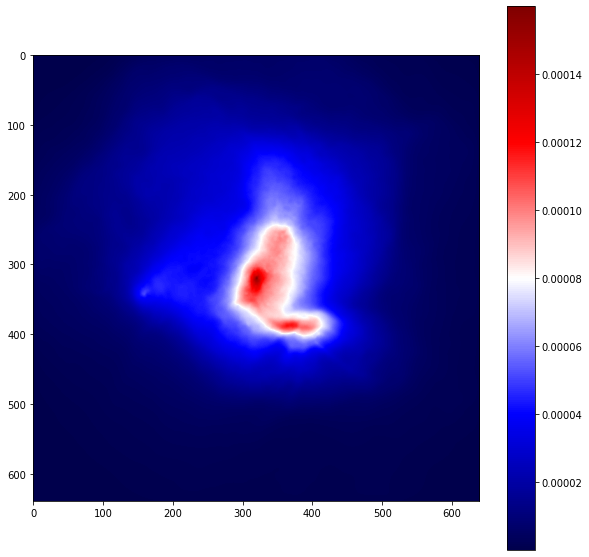

12
12
12


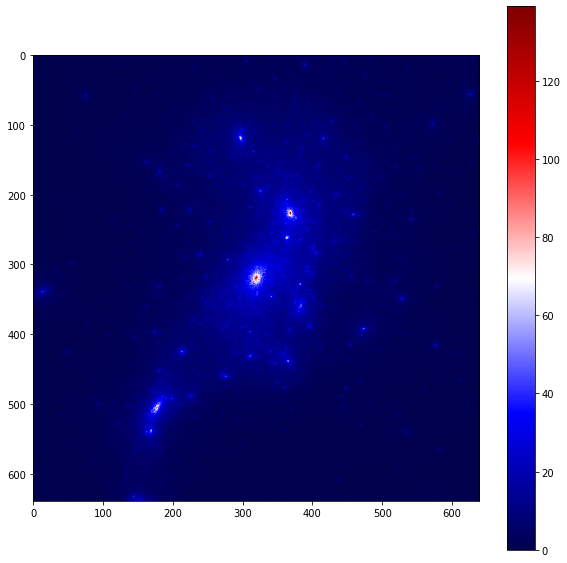

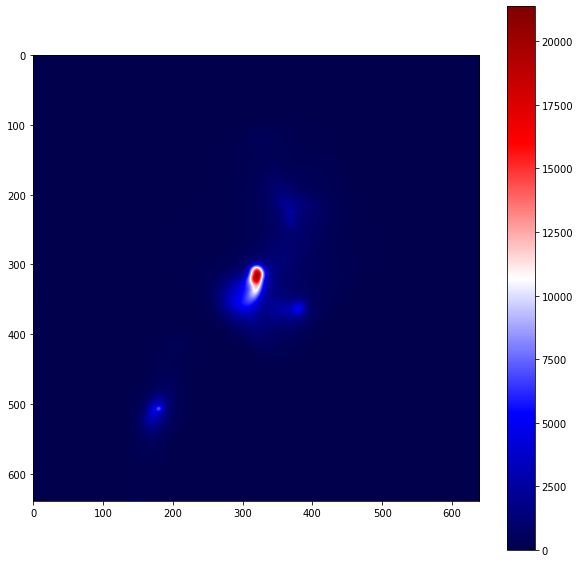

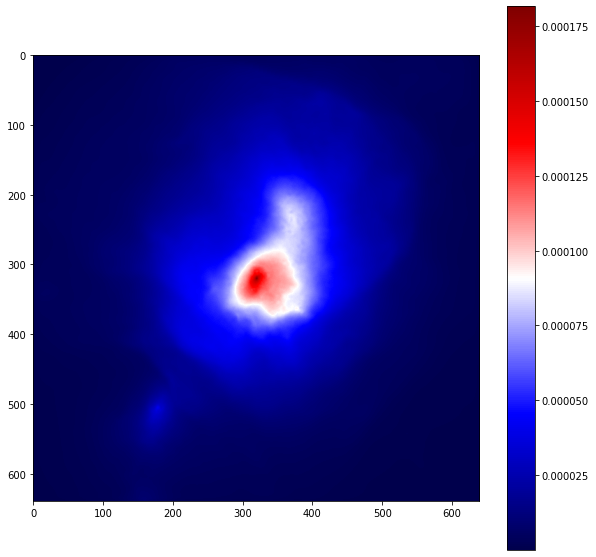

13
13
13


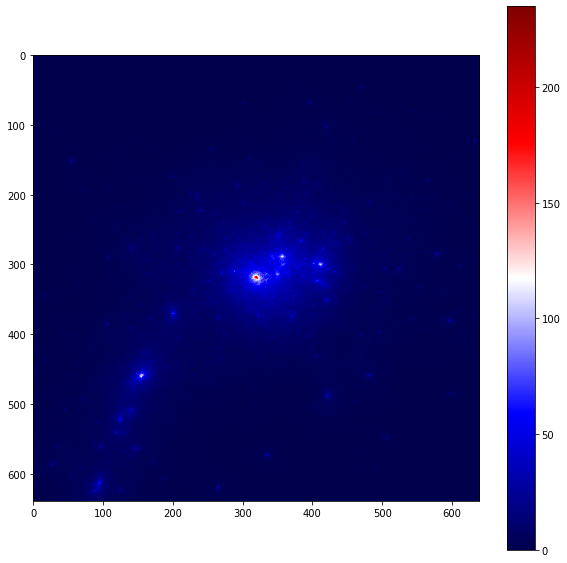

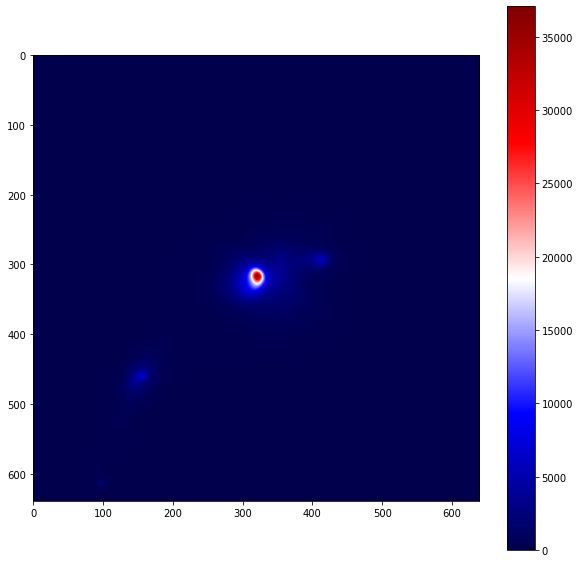

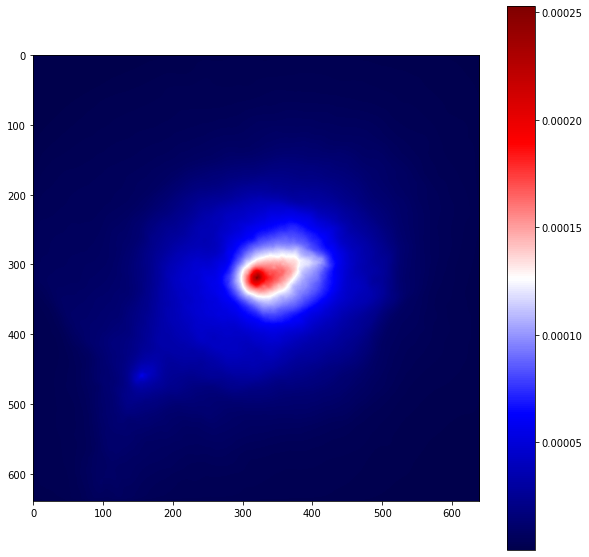

14
14
14


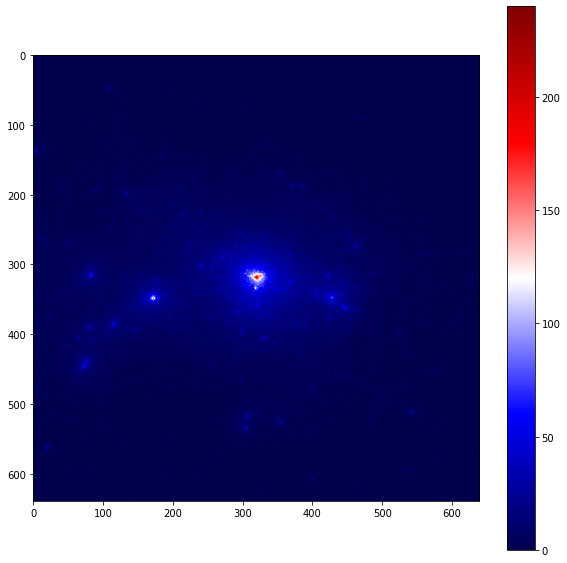

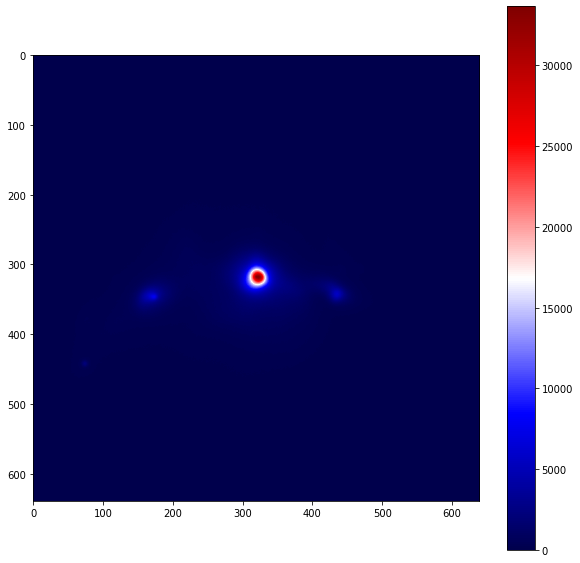

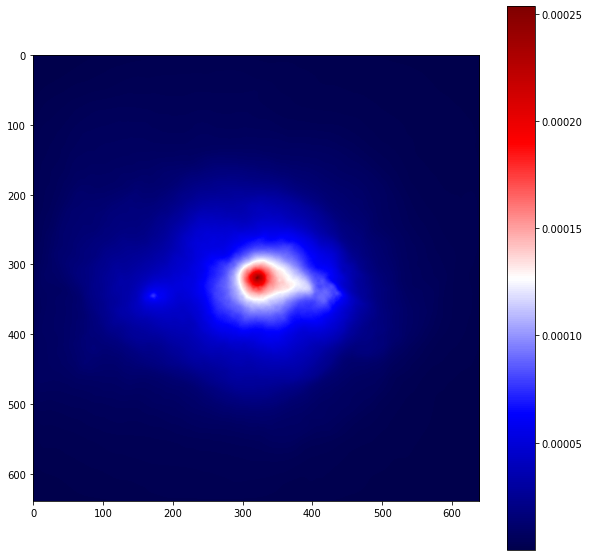

15
15
15


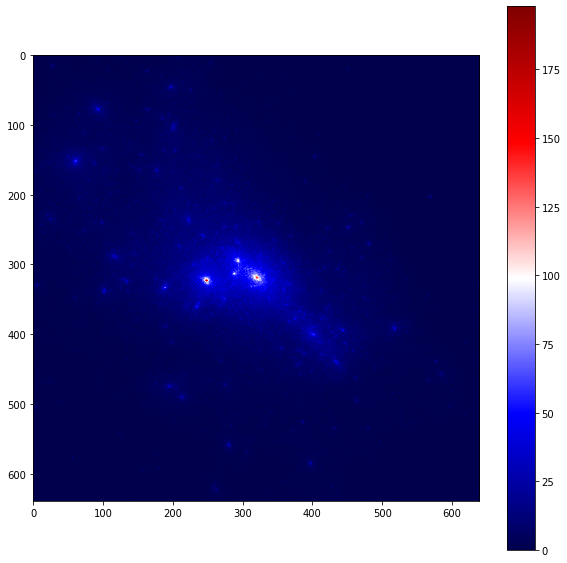

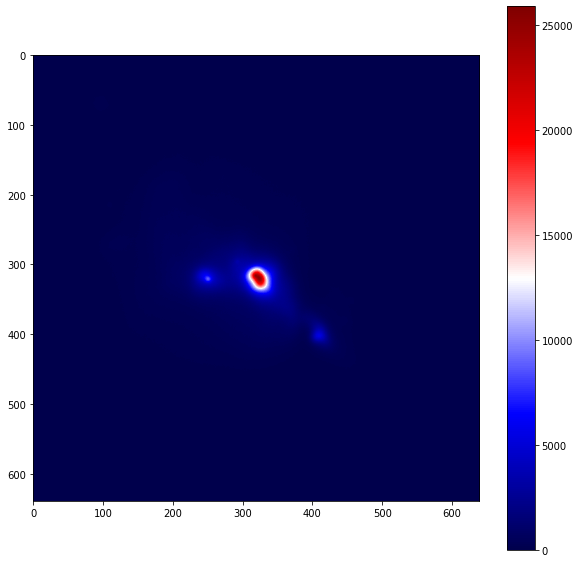

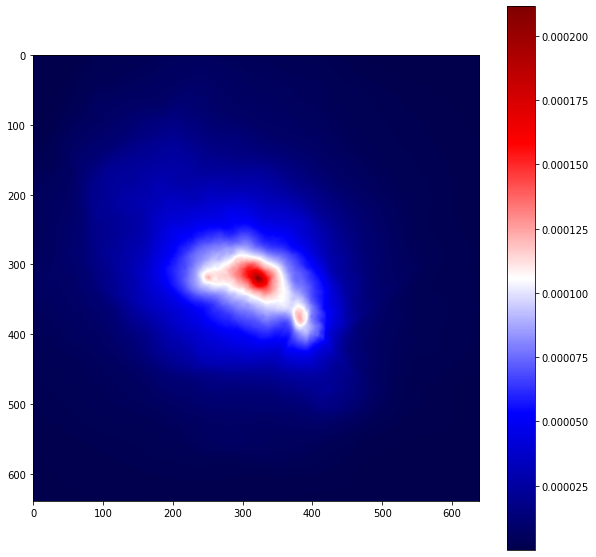

16
16
16


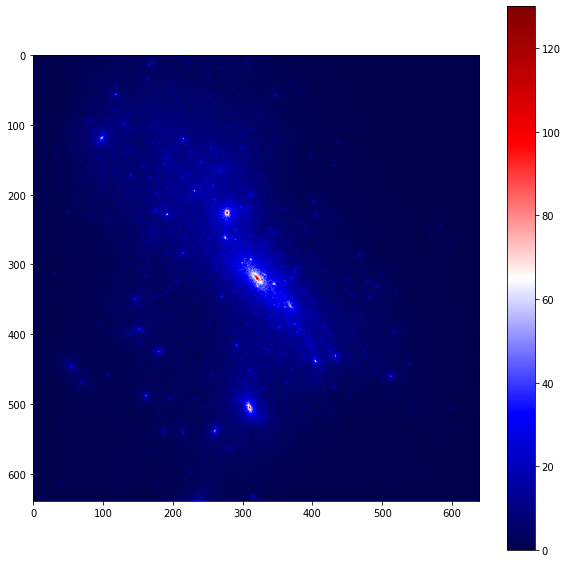

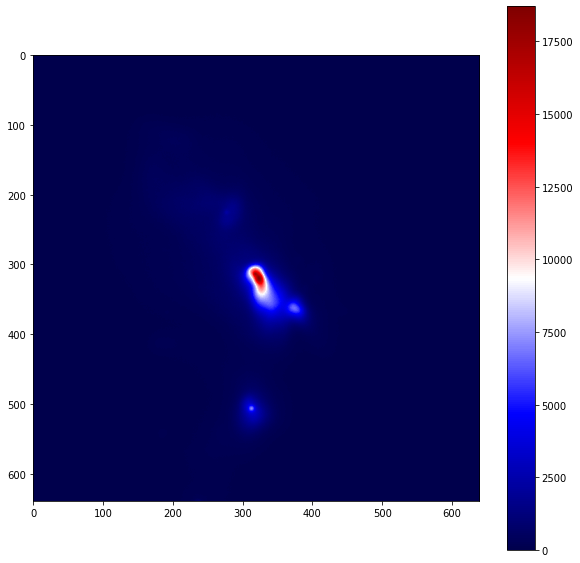

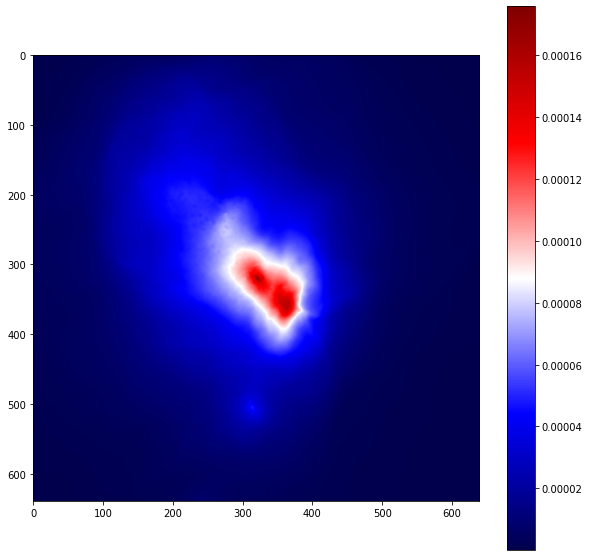

17
17
17


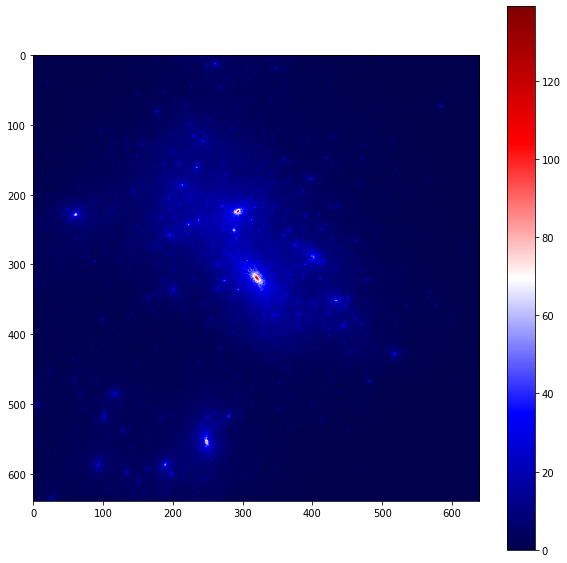

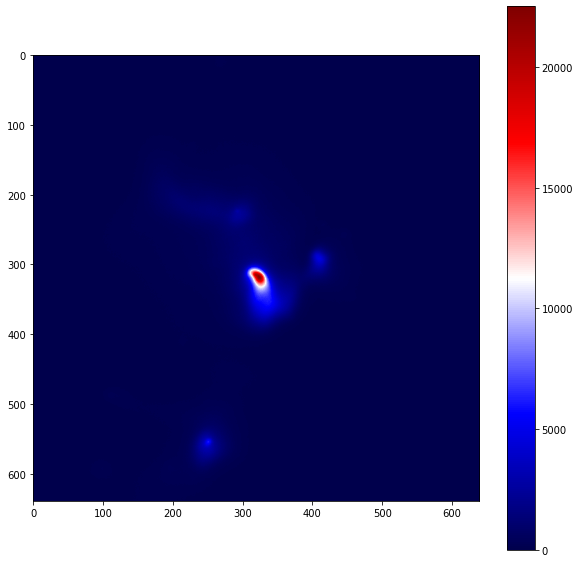

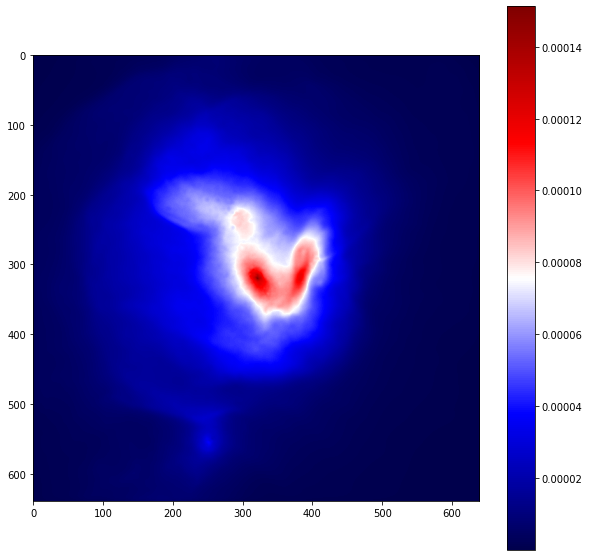

18
18
18


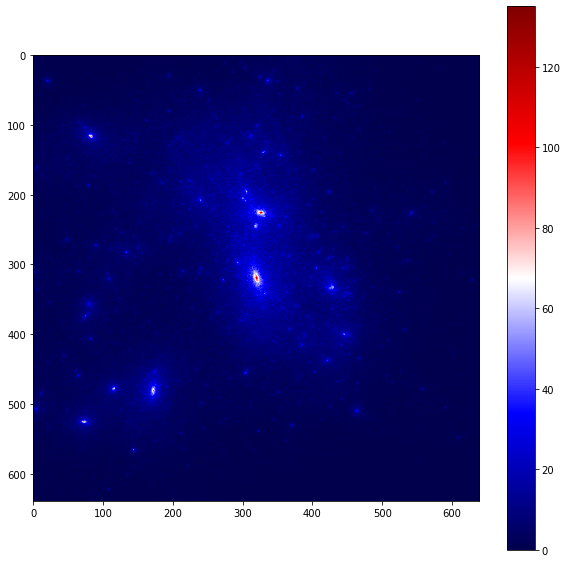

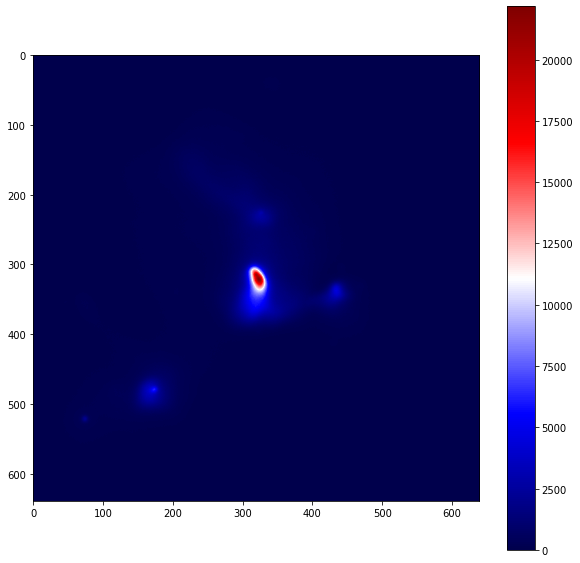

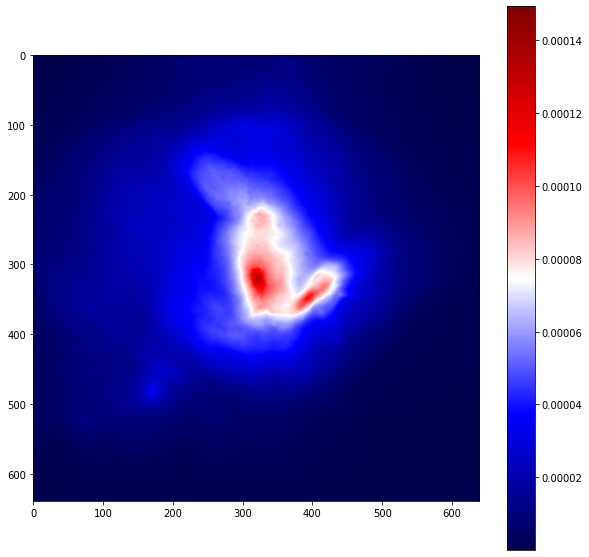

19
19
19


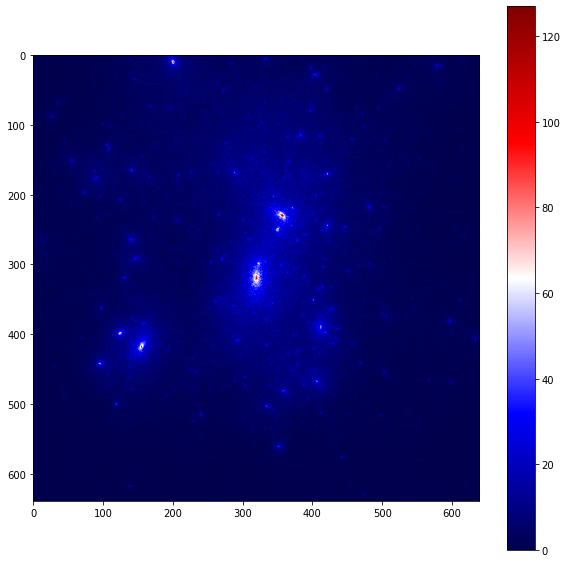

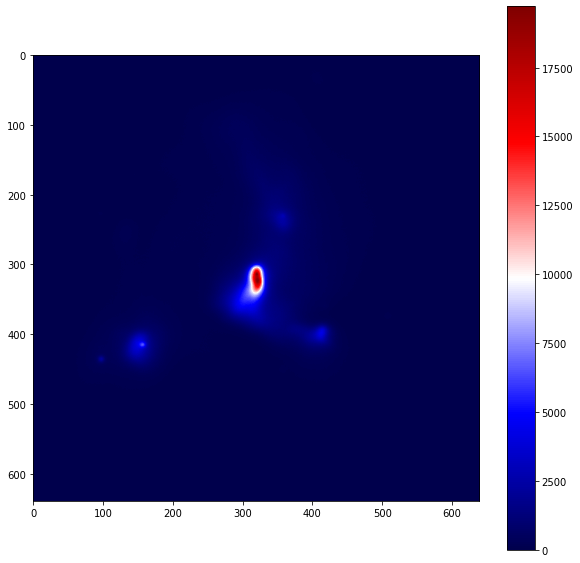

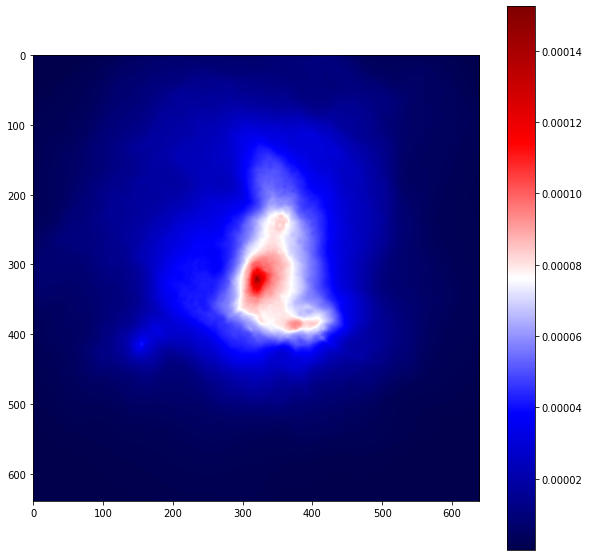

20
20
20


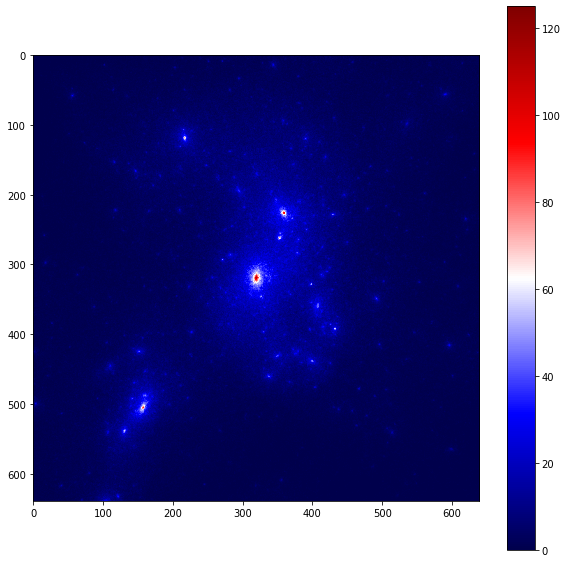

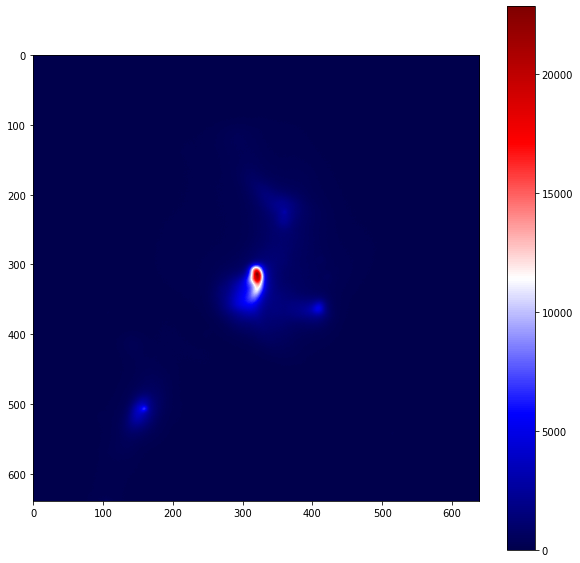

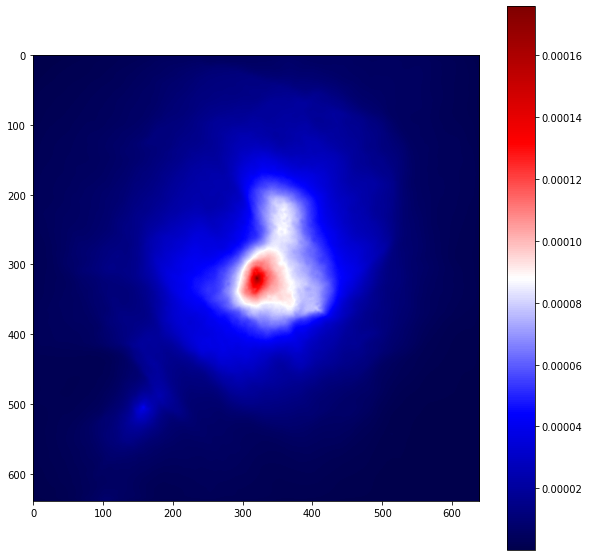

21
21
21


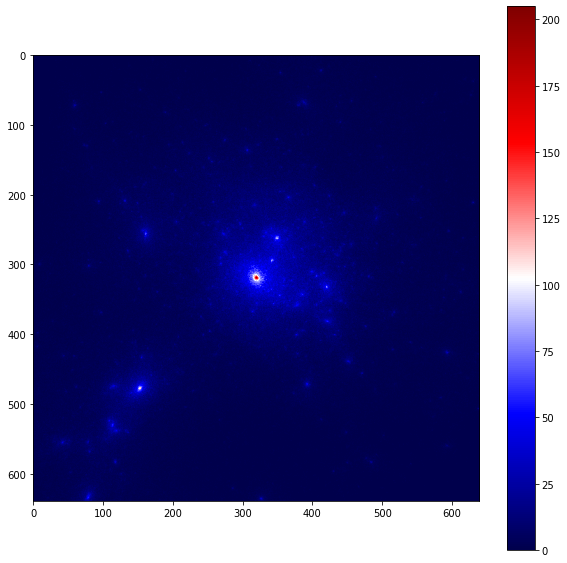

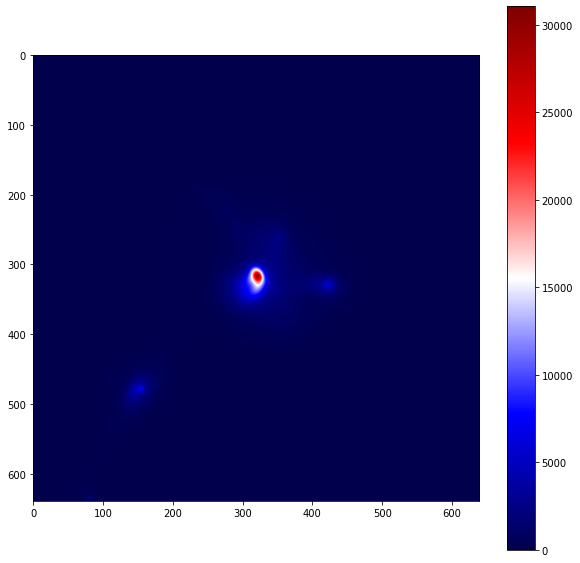

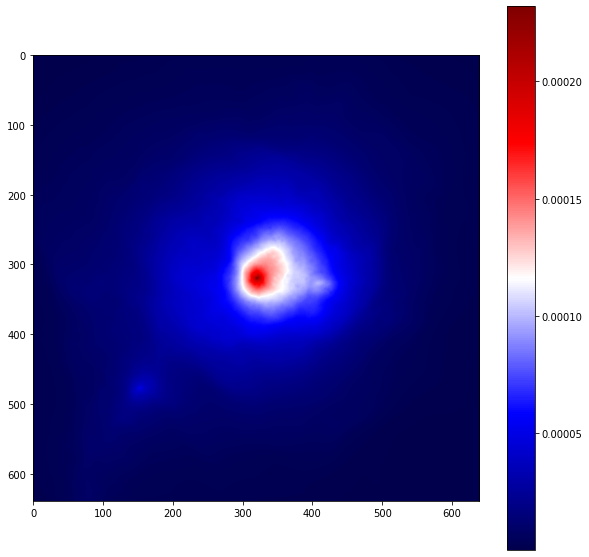

22
22
22


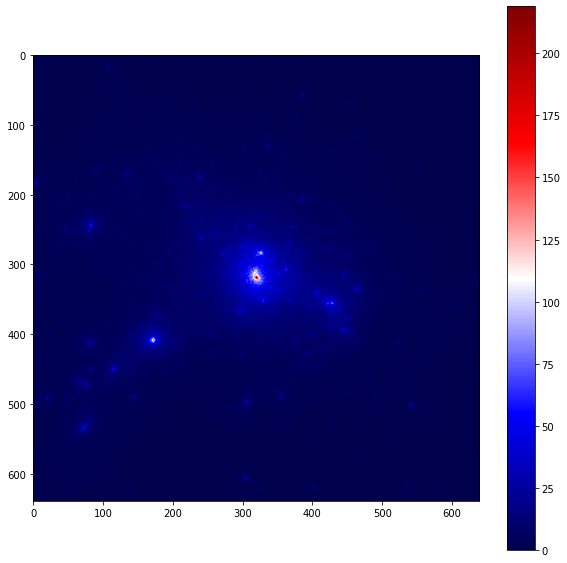

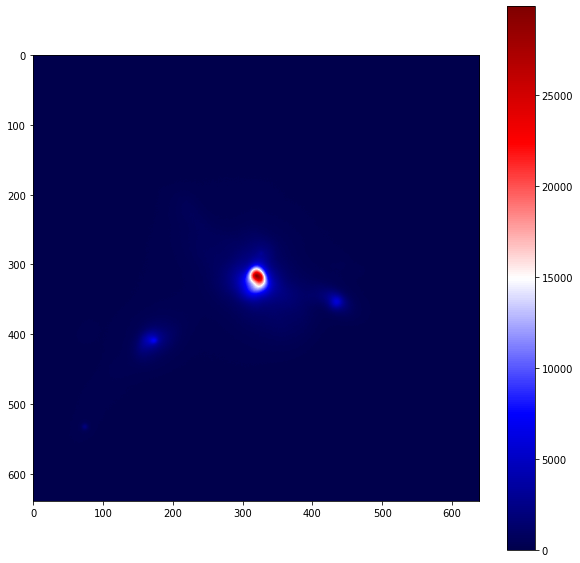

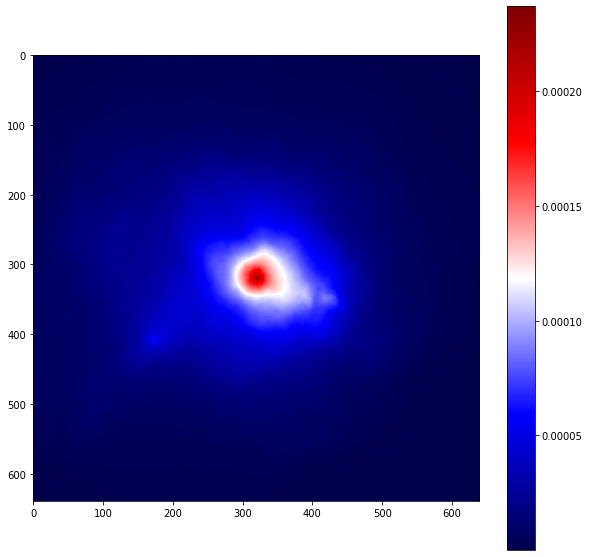

23
23
23


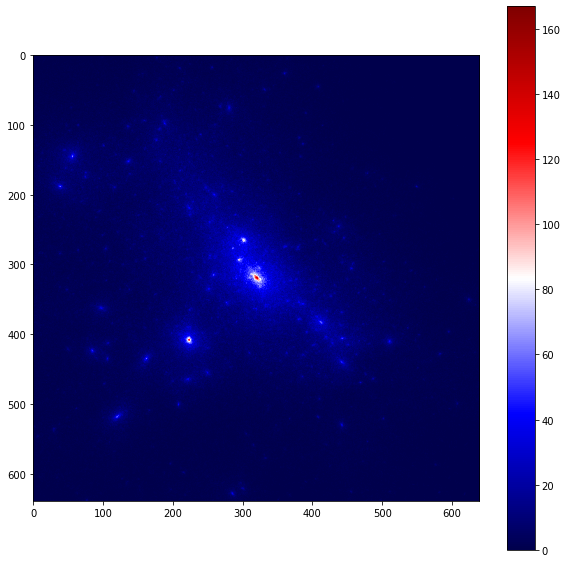

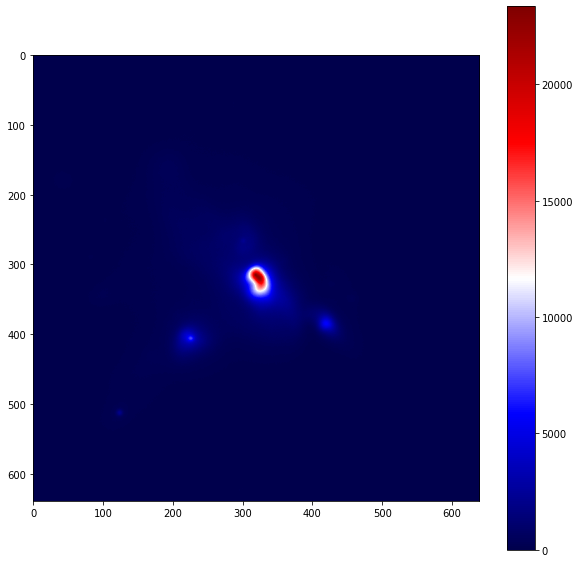

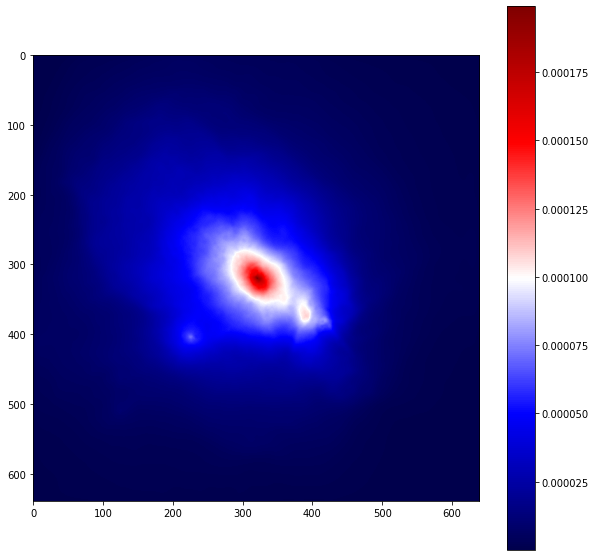

24
24
24


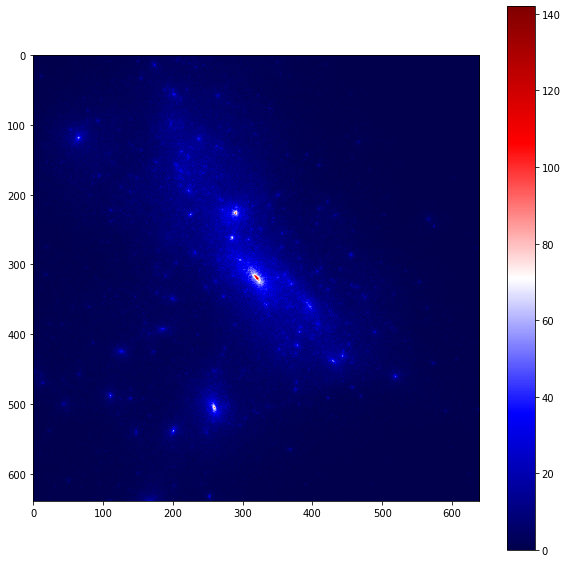

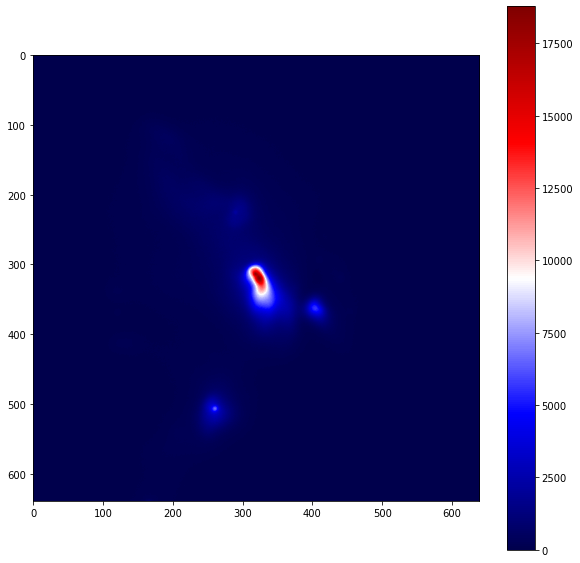

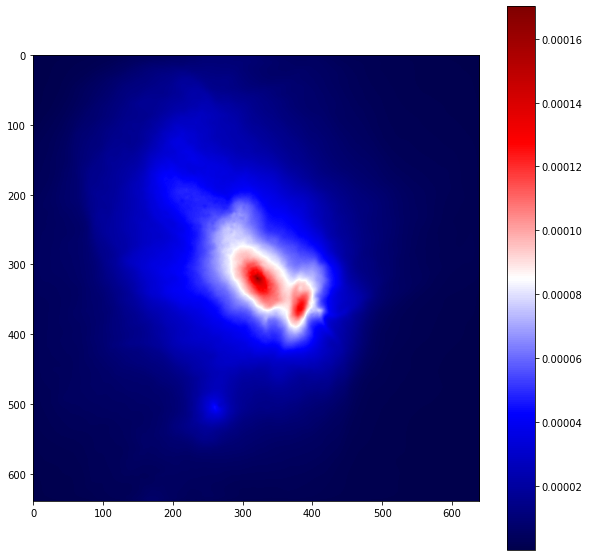

25
25
25


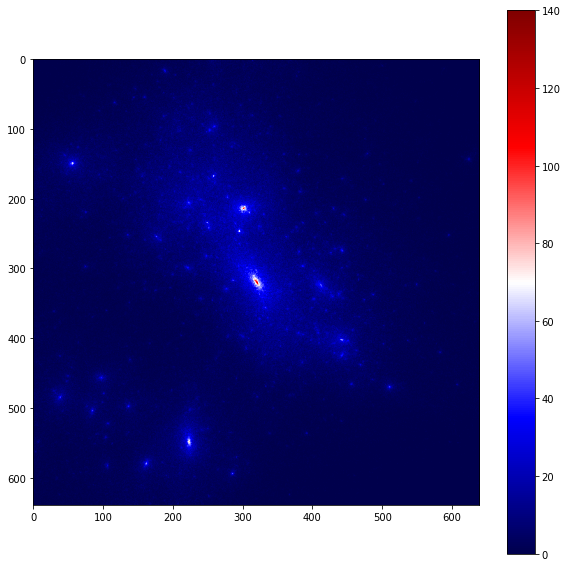

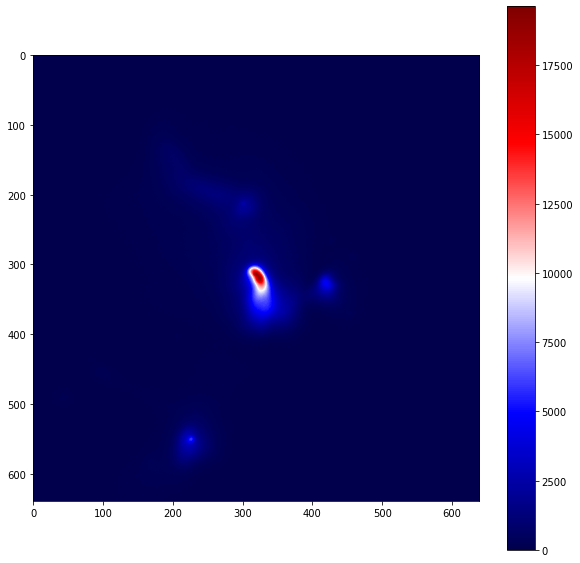

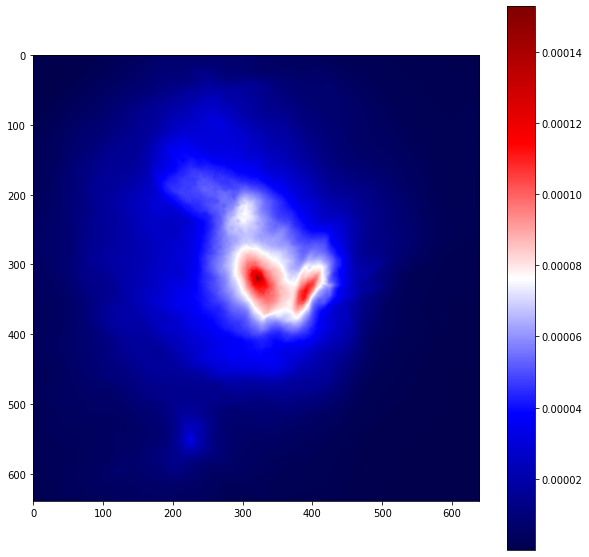

26
26
26


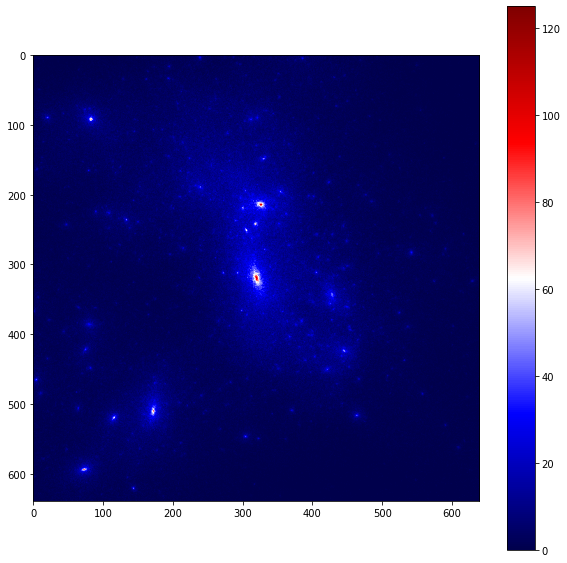

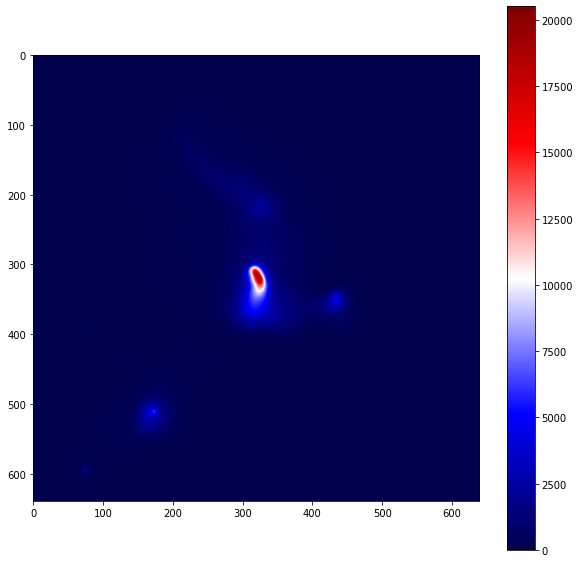

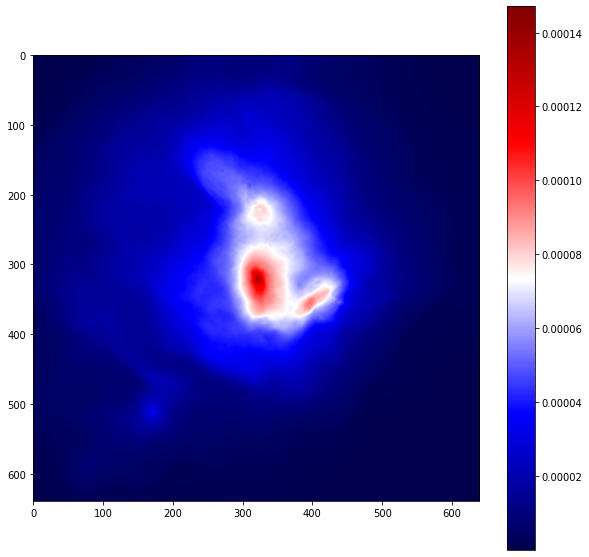

27
27
27


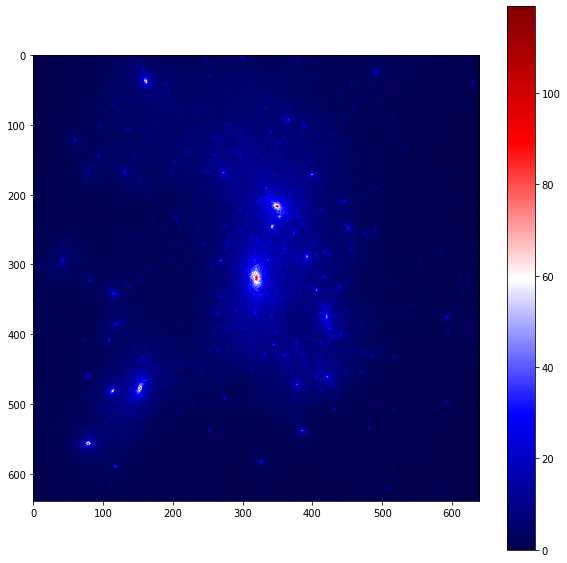

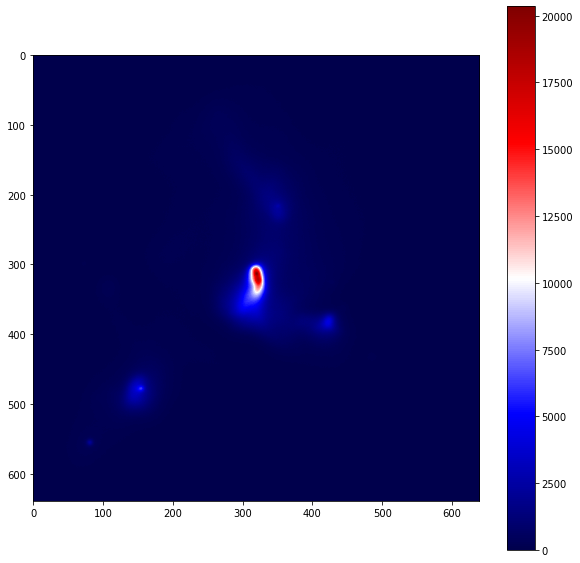

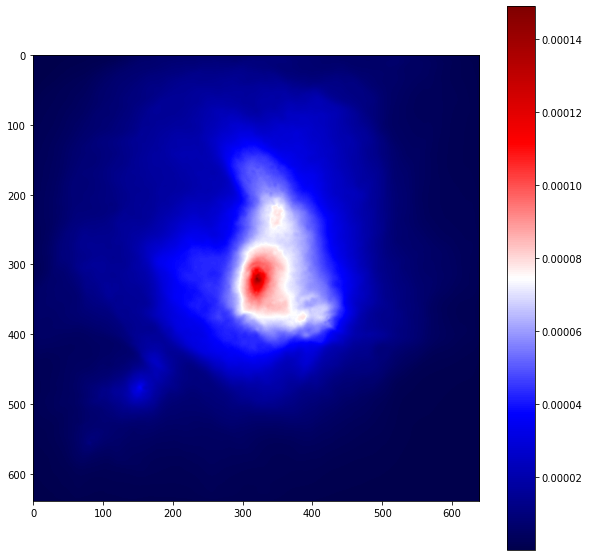

28
28
28


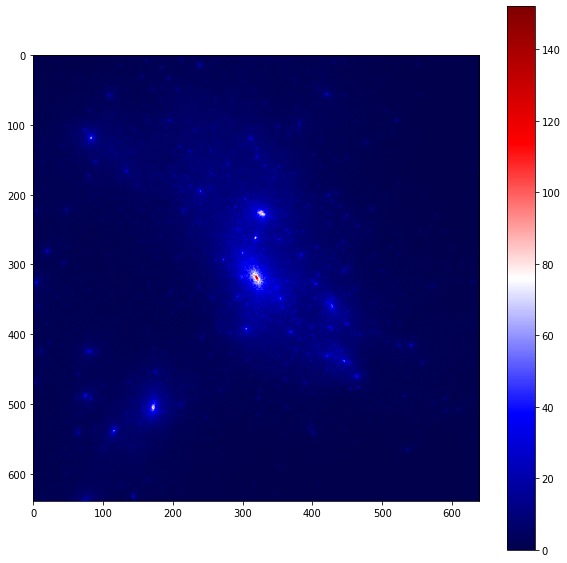

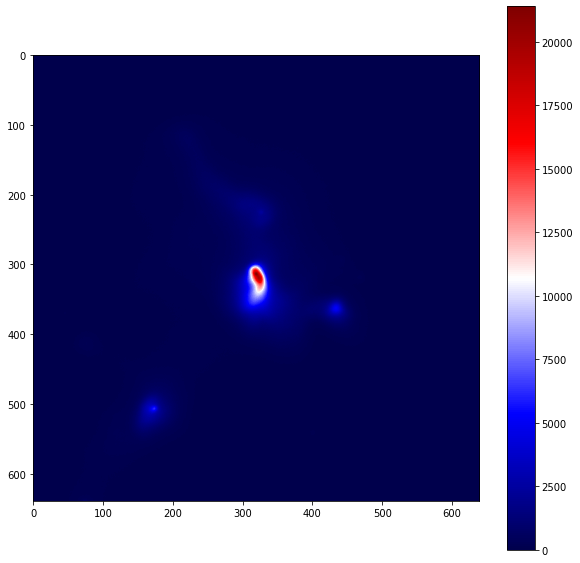

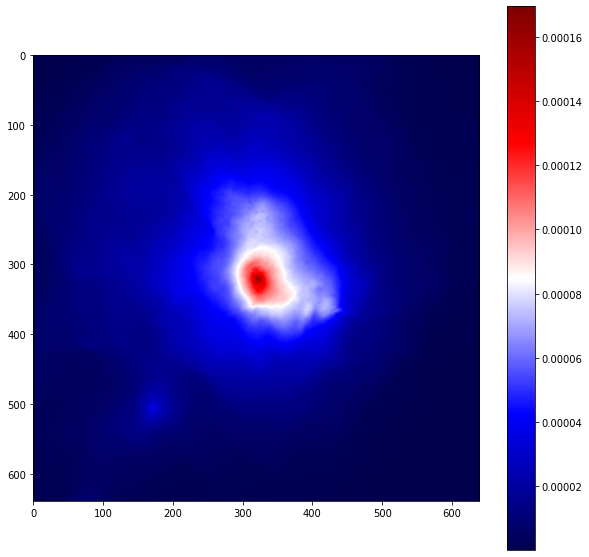

In [5]:
for RA in RAs:
    dm = read_dm(lp,hid,RA)
    Xray = read_xr(lp,hid,RA)
    SZ = read_sz(lp,hid,RA)
    plot_cluster(dm)
    plot_cluster(Xray)
    plot_cluster(SZ)

In [7]:
### how many haloes there are?
from os import walk
import numpy as np

f = []
regionID =[] 
cluster = '/NewMDCLUSTER_{}'
for i in range(1,325):
    mypath=path+"DM/"+cluster.format(str(i).zfill(4))

    #print(mypath)
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(sorted(filenames))
        regionID.append(i*np.ones(len(filenames)))
        break

n_maps = len(f)
n_clusters = n_maps/29

print('there are',n_maps,'maps')
print('there are',n_clusters,' clusters')


there are 377 maps
there are 13.0  clusters


In [24]:
(67449+(65-32)*29)/29

2358.8275862068967